## 入门pandas【解读pandas官方文档】 

前言

其实，学习Python很好的方法是去看官方文档。

有人会说，我零基础，看不懂啊！

也有人会说，我英语差，看不懂啊！！

还有人会说，我想学实战案例，不想看的这么详细！！！


是的，官方文档说的面面俱到，像是查字典似的，对于初学者是很不友善的

所以大部分人选择了:拒绝！

其实，我以前也是不看官方文档的，但有些问题百度不到，看的书里没讲到，那我就被迫去看官方文档了

此举给我打开了学习Python的一扇窗

我发现，官方文档其实有很多例子和入门学习内容，比如我们今天要说的

## # 十分钟入门Pandas

更多用法可以看它的cookbook：http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook

手册速查：https://zhuanlan.zhihu.com/p/25630700

In [1]:
# 导入模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#这分别导入了pandas、numpy包 和 matplotlib 包中的 pyplot 模块 

### 创建对象

请参见“数据结构简介”部分：http://pandas.pydata.org/pandas-docs/version/0.20/dsintro.html#dsintro

In [2]:
#通过一个列表的值创建一个系列，让pandas创建一个默认的整数索引：
s = pd.Series([1,3,5,np.nan,6,8])
s  #注意：np.nan表示不存在

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
#通过numpy创建的数组，可以创建一个pandas中特有的dataframe，使用datetime作为索引和标记列名。
dates = pd.date_range('20130101', periods=6)
dates
#这里的date_range()是pandas下的一个方法，可以在jupyter notebook下使用如下方法查看使用说明：
#?pd.date_range()
#我们可以看到这个方法的使用说明和各个参数的作用
#看到这个方法是返回固定频率日期时间索引，返回连续的六个日期信息

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df
#?np.random.randn()

#np.random.randn(6,4)是生成6行4列的标准正态分布数据
#注：这里使用ABCD为列标签，之前生成的日期序列为行标签，6行4列标准正态分布数据为内容的dataframe

,A,B,C,D
2013-01-01,-1.703983,0.557363,-0.081021,1.114630
2013-01-02,-1.012761,0.012988,-0.345846,-0.537505
2013-01-03,-1.892182,1.848365,1.182733,0.051671
2013-01-04,1.980916,-1.072174,-0.410039,-0.112108
2013-01-05,-0.163472,0.682573,0.669757,1.318063
2013-01-06,1.403645,-0.238608,-1.397091,-2.045036


In [5]:
#使用字典来创建dataframe
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [10]:
#查看dataframe的类型信息
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### 查看数据

更多内容请参阅基础部分：http://pandas.pydata.org/pandas-docs/version/0.20/basics.html#basics

查看dataframe顶部和底部的行（默认五行）

In [11]:
df.head()#查看默认前五行

,A,B,C,D
2013-01-01,-0.041022,0.215674,-0.363168,-0.503140
2013-01-02,0.784612,-1.128158,-1.399327,-0.118351
2013-01-03,-0.321624,0.230828,-0.579380,-0.299381
2013-01-04,0.978000,0.336666,-0.174605,-1.100408
2013-01-05,-0.903347,0.581018,0.768395,-0.297108


In [12]:
df.tail()#查看默认后五行

,A,B,C,D
2013-01-02,0.784612,-1.128158,-1.399327,-0.118351
2013-01-03,-0.321624,0.230828,-0.579380,-0.299381
2013-01-04,0.978000,0.336666,-0.174605,-1.100408
2013-01-05,-0.903347,0.581018,0.768395,-0.297108
2013-01-06,0.875284,0.829356,0.653218,-0.199830


In [13]:
df.head(3)#查看前三行

,A,B,C,D
2013-01-01,-0.041022,0.215674,-0.363168,-0.503140
2013-01-02,0.784612,-1.128158,-1.399327,-0.118351
2013-01-03,-0.321624,0.230828,-0.579380,-0.299381


显示索引，列和底层numpy数据

In [15]:
df.index#显示索引

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns  #显示列名：

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values  #查看底层numpy数据：

array([[-0.04102232,  0.21567386, -0.36316783, -0.50314044],
       [ 0.78461247, -1.12815818, -1.39932687, -0.11835074],
       [-0.32162353,  0.23082773, -0.57937979, -0.29938117],
       [ 0.97800007,  0.33666585, -0.17460492, -1.10040764],
       [-0.90334671,  0.58101788,  0.76839529, -0.29710814],
       [ 0.87528359,  0.82935638,  0.65321785, -0.19983027]])

In [18]:
df.describe() #对数据的描述性统计信息
#注意：数据需要是数字类型（float，int等)

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.228651,0.177564,-0.182478,-0.419703
std,0.767554,0.681487,0.809137,0.357487
min,-0.903347,-1.128158,-1.399327,-1.100408
25%,-0.251473,0.219462,-0.525327,-0.452201
50%,0.371795,0.283747,-0.268886,-0.298245
75%,0.852616,0.519930,0.446262,-0.224150
max,0.978000,0.829356,0.768395,-0.118351


In [20]:
df.T #转置调换数据
#注意：就像线性代数里面的转置矩阵

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.041022,0.784612,-0.321624,0.978000,-0.903347,0.875284
B,0.215674,-1.128158,0.230828,0.336666,0.581018,0.829356
C,-0.363168,-1.399327,-0.579380,-0.174605,0.768395,0.653218
D,-0.503140,-0.118351,-0.299381,-1.100408,-0.297108,-0.199830


In [21]:
#按轴排序
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.503140,-0.363168,0.215674,-0.041022
2013-01-02,-0.118351,-1.399327,-1.128158,0.784612
2013-01-03,-0.299381,-0.579380,0.230828,-0.321624
2013-01-04,-1.100408,-0.174605,0.336666,0.978000
2013-01-05,-0.297108,0.768395,0.581018,-0.903347
2013-01-06,-0.199830,0.653218,0.829356,0.875284


In [23]:
#?df.sort_index(axis=1, ascending=False)
#这说明axis可以取0或者1，我们试试看0：
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2013-01-06,0.875284,0.829356,0.653218,-0.199830
2013-01-05,-0.903347,0.581018,0.768395,-0.297108
2013-01-04,0.978000,0.336666,-0.174605,-1.100408
2013-01-03,-0.321624,0.230828,-0.579380,-0.299381
2013-01-02,0.784612,-1.128158,-1.399327,-0.118351
2013-01-01,-0.041022,0.215674,-0.363168,-0.503140


In [24]:
#按值排序
df.sort_values(by='B')  #这是B列数据排序，并且其他数据参照B列数据变化。

,A,B,C,D
2013-01-02,0.784612,-1.128158,-1.399327,-0.118351
2013-01-01,-0.041022,0.215674,-0.363168,-0.503140
2013-01-03,-0.321624,0.230828,-0.579380,-0.299381
2013-01-04,0.978000,0.336666,-0.174605,-1.100408
2013-01-05,-0.903347,0.581018,0.768395,-0.297108
2013-01-06,0.875284,0.829356,0.653218,-0.199830


### 选择数据

更多内容请参阅索引文档索引：http://pandas.pydata.org/pandas-docs/version/0.20/indexing.html#indexing

和选择数据和多指标/高级索引：http://pandas.pydata.org/pandas-docs/version/0.20/advanced.html#advanced

In [27]:
#选择一个列，返回一个Series，相当于df.A
df['A'] #取A列数据，返回的是一个序列

2013-01-01   -0.041022
2013-01-02    0.784612
2013-01-03   -0.321624
2013-01-04    0.978000
2013-01-05   -0.903347
2013-01-06    0.875284
Freq: D, Name: A, dtype: float64

In [28]:
#选择通过[]，切片出行数据

df[0:3] #使用默认索引取出前三行

,A,B,C,D
2013-01-01,-0.041022,0.215674,-0.363168,-0.503140
2013-01-02,0.784612,-1.128158,-1.399327,-0.118351
2013-01-03,-0.321624,0.230828,-0.579380,-0.299381


In [29]:
df['20130102':'20130104'] #使用新索引取出对应行

,A,B,C,D
2013-01-02,0.784612,-1.128158,-1.399327,-0.118351
2013-01-03,-0.321624,0.230828,-0.579380,-0.299381
2013-01-04,0.978000,0.336666,-0.174605,-1.100408


### 标签选择

在标签选择中查看更多内容：http://pandas.pydata.org/pandas-docs/version/0.20/indexing.html#indexing-label

In [31]:
#使用标签获取一块数据：

df.loc[dates[0]] #取出第一行

A   -0.041022
B    0.215674
C   -0.363168
D   -0.503140
Name: 2013-01-01 00:00:00, dtype: float64

In [32]:
#通过标签选择多列：

df.loc[:,['A','B']] #这里选择的是A,B列数据

,A,B
2013-01-01,-0.041022,0.215674
2013-01-02,0.784612,-1.128158
2013-01-03,-0.321624,0.230828
2013-01-04,0.978000,0.336666
2013-01-05,-0.903347,0.581018
2013-01-06,0.875284,0.829356


In [33]:
### 显示标签切片：

df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.784612,-1.128158
2013-01-03,-0.321624,0.230828
2013-01-04,0.978000,0.336666


In [34]:
#减少返回对象的维度：

df.loc['20130102',['A','B']]

A    0.784612
B   -1.128158
Name: 2013-01-02 00:00:00, dtype: float64

In [35]:
#获得标量值（就是定位一个具体的值）：

df.loc[dates[0],'A']

-0.041022317767430962

In [36]:
#快速访问标量（等同于先前的方法）：

df.at[dates[0],'A']

-0.041022317767430962

### 按位置选择
更多按位置选择内容：http://pandas.pydata.org/pandas-docs/version/0.20/indexing.html#indexing-integer


通过传递的整数的位置进行选择：

In [6]:
df.iloc[3] #取出第三行

A   -1.058696
B    0.023663
C    0.345492
D    0.364095
Name: 2013-01-04 00:00:00, dtype: float64

通过整数切片，类似于numpy / python：

In [10]:
df.iloc[3:5,0:2]  #切出3-4行，1-2列一块区域

,A,B
2013-01-04,-1.058696,0.023663
2013-01-05,1.419695,-0.750296


In [11]:
#通过整数位置列表切分，类似numpy的/ Python的风格：
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.513042,1.089488
2013-01-03,1.548976,0.457258
2013-01-05,1.419695,1.601742


In [14]:
#切分出某些行：
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.513042,-1.077741,1.089488,-0.419946
2013-01-03,1.548976,0.404802,0.457258,-1.101466


In [15]:
#获取某个值
df.iloc[1,1]

-1.0777413526911526

In [16]:
#快速访问某个值（等同于先前的方法）：
df.iat[1,1]

-1.0777413526911526

### 布尔索引

使用单列值选择数据

In [17]:
df[df.A > 0]
#注意：先判断A栏中大于零的数，然后把这些行取出来

,A,B,C,D
2013-01-01,1.433243,-0.829467,0.174798,0.626780
2013-01-02,0.513042,-1.077741,1.089488,-0.419946
2013-01-03,1.548976,0.404802,0.457258,-1.101466
2013-01-05,1.419695,-0.750296,1.601742,-0.174387


In [18]:
#从满足布尔条件的DataFrame中选择值：

df[df > 0]

#注：显示dataframe中大于零的数

,A,B,C,D
2013-01-01,1.433243,NaN,0.174798,0.626780
2013-01-02,0.513042,NaN,1.089488,NaN
2013-01-03,1.548976,0.404802,0.457258,NaN
2013-01-04,NaN,0.023663,0.345492,0.364095
2013-01-05,1.419695,NaN,1.601742,NaN
2013-01-06,NaN,NaN,NaN,NaN


In [20]:
#使用isin（）方法进行过滤：

df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2 #注：copy了一份dataframe，然后新加了一列E

,A,B,C,D,E
2013-01-01,1.433243,-0.829467,0.174798,0.626780,one
2013-01-02,0.513042,-1.077741,1.089488,-0.419946,one
2013-01-03,1.548976,0.404802,0.457258,-1.101466,two
2013-01-04,-1.058696,0.023663,0.345492,0.364095,three
2013-01-05,1.419695,-0.750296,1.601742,-0.174387,four
2013-01-06,-0.176502,-1.567668,-0.218026,-0.352392,three


In [21]:
#?df2.isin()

#从help文件可以知道isin()方法的作用是：

#DataFrame显示每个元素是否在DataFrame包含在值中,返回boolean.

df2[df2['E'].isin(['two','four'])]

#相当于判断two和four两列是否在df2中，在的话返回True，然后将参数传入df2，返回这两列的值。

,A,B,C,D,E
2013-01-03,1.548976,0.404802,0.457258,-1.101466,two
2013-01-05,1.419695,-0.750296,1.601742,-0.174387,four


### 设置

In [22]:
#置新的列会自动使索引对齐数据：
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [23]:
df['F'] = s1
df
#这里用和原来一样的索引（时间）为原来的dataframe增加了一列数据

,A,B,C,D,F
2013-01-01,1.433243,-0.829467,0.174798,0.626780,NaN
2013-01-02,0.513042,-1.077741,1.089488,-0.419946,1.0
2013-01-03,1.548976,0.404802,0.457258,-1.101466,2.0
2013-01-04,-1.058696,0.023663,0.345492,0.364095,3.0
2013-01-05,1.419695,-0.750296,1.601742,-0.174387,4.0
2013-01-06,-0.176502,-1.567668,-0.218026,-0.352392,5.0


In [36]:
#通过使用numpy数组分配进行设置:

df.loc[:,'D'] = np.array([5] * len(df))
df
#注：产生一个数组，每个元素值为5，长度为df的行数，替换在原来df的D列

,A,B,C,D,F
2013-01-01,1.433243,0.000000,0.174798,5,NaN
2013-01-02,0.513042,-1.077741,1.089488,5,1.0
2013-01-03,1.548976,0.404802,0.457258,5,2.0
2013-01-04,-1.058696,0.023663,0.345492,5,3.0
2013-01-05,1.419695,-0.750296,1.601742,5,4.0
2013-01-06,-0.176502,-1.567668,-0.218026,5,5.0


In [37]:
#按位置设定值：
df.iat[0,1] = 0
df
#注：将第一行第二列的数值设定为0

,A,B,C,D,F
2013-01-01,1.433243,0.000000,0.174798,5,NaN
2013-01-02,0.513042,-1.077741,1.089488,5,1.0
2013-01-03,1.548976,0.404802,0.457258,5,2.0
2013-01-04,-1.058696,0.023663,0.345492,5,3.0
2013-01-05,1.419695,-0.750296,1.601742,5,4.0
2013-01-06,-0.176502,-1.567668,-0.218026,5,5.0


In [40]:
#设置操作：

df2 = df.copy()
df2[df2 > 0] = -df2
df2
#注：将df copy一份命名为df2，然后将df2中大于零的数加负号
#参考  参考文献:http://pandas.pydata.org/pandas-docs/version/0.20/10min.html#selection

,A,B,C,D,F
2013-01-01,-1.433243,0.000000,-0.174798,-5,NaN
2013-01-02,-0.513042,-1.077741,-1.089488,-5,-1.0
2013-01-03,-1.548976,-0.404802,-0.457258,-5,-2.0
2013-01-04,-1.058696,-0.023663,-0.345492,-5,-3.0
2013-01-05,-1.419695,-0.750296,-1.601742,-5,-4.0
2013-01-06,-0.176502,-1.567668,-0.218026,-5,-5.0


# 中

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,1.317181,1.318491,-1.781522,-0.345757
2013-01-02,0.827127,0.774527,0.582425,-1.312169
2013-01-03,0.938149,0.957378,-0.736190,-0.845775
2013-01-04,-0.950147,-2.348084,-1.340335,2.516716
2013-01-05,-1.322743,0.764515,1.818695,-1.175141
2013-01-06,-0.952256,-0.181709,-0.175145,-0.249333


### 缺失值处理

pandas主要使用值np.nan来表示丢失的数据。 默认情况下不包括在计算中。 请参阅缺少数据部分：http://pandas.pydata.org/pandas-docs/version/0.20/missing_data.html#missing-data

重新索引允许您更改/添加/删除指定轴上的索引。 这将返回数据的副本。



In [11]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

df1.loc[dates[0]:dates[1],'E'] = 1

df1
#注：增加了一个新列E，并且给E列第一行和第二行数据赋值为1，则没赋值的数据显示不存在。

,A,B,C,D,E
2013-01-01,0.307542,-1.003312,-0.187681,-0.487298,1.0
2013-01-02,0.178463,0.336065,-1.268173,-0.587128,1.0
2013-01-03,-0.212807,2.461145,1.258369,1.899394,NaN
2013-01-04,-1.327291,-1.853210,-0.055177,1.253360,NaN


In [12]:
#删除存在缺失值的行：

df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.307542,-1.003312,-0.187681,-0.487298,1.0
2013-01-02,0.178463,0.336065,-1.268173,-0.587128,1.0


In [14]:
#填充缺失值：

df1.fillna(value=5)

#注：这里使用5去填充，实际中，我们做数据分析常用0，中位数，平均数来填充。

,A,B,C,D,E
2013-01-01,0.307542,-1.003312,-0.187681,-0.487298,1.0
2013-01-02,0.178463,0.336065,-1.268173,-0.587128,1.0
2013-01-03,-0.212807,2.461145,1.258369,1.899394,5.0
2013-01-04,-1.327291,-1.853210,-0.055177,1.253360,5.0


In [16]:
#查看空值数据：

pd.isnull(df1)
#注：返回True的是空值数据

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


### 操作

请参阅二进制操作的基本部分：http://pandas.pydata.org/pandas-docs/version/0.20/basics.html#basics-binop

### 统计

操作中一般不包含丢失的数据

执行描述性统计：

In [17]:
df.mean() #求每列平均值

A   -0.376586
B   -0.005401
C    0.263381
D    0.087167
dtype: float64

In [18]:
df.mean(1) #每行求平均值

2013-01-01   -0.342688
2013-01-02   -0.335194
2013-01-03    1.351525
2013-01-04   -0.495580
2013-01-05   -0.339419
2013-01-06    0.114197
Freq: D, dtype: float64

### Apply

将功能用于处理数据

In [6]:
df.apply(np.cumsum)
#注：列累加，就是第二列的结果等于第一列加第二列数据，依次累加。

,A,B,C,D
2013-01-01,-1.703983,0.557363,-0.081021,1.114630
2013-01-02,-2.716743,0.570351,-0.426867,0.577125
2013-01-03,-4.608926,2.418717,0.755866,0.628795
2013-01-04,-2.628010,1.346542,0.345827,0.516688
2013-01-05,-2.791481,2.029115,1.015584,1.834751
2013-01-06,-1.387836,1.790508,-0.381507,-0.210285


In [7]:
#使用匿名函数求每列的最大值和最小值的差：

df.apply(lambda x: x.max() - x.min())

A    3.873098
B    2.920539
C    2.579825
D    3.363100
dtype: float64

### 直方图化

直方图和离散化查看更多资料：http://pandas.pydata.org/pandas-docs/version/0.20/basics.html#basics-discretization

In [9]:
s = pd.Series(np.random.randint(0, 7, size=10))
s
#注：在0-7中随机产生10个整数

0    2
1    1
2    0
3    6
4    6
5    3
6    5
7    1
8    6
9    0
dtype: int32

In [10]:
s.value_counts()
#注：对数据进行计数

6    3
1    2
0    2
5    1
3    1
2    1
dtype: int64

## 操作字符串的方法
### 字符串方法

Series中配置了一组字符串处理方法，使其易于在数组的每个元素上进行操作，如下面的代码片段所示。请注意，str中的模式匹配通常默认使用正则表达式（在某些情况下始终使用它们）。 在矢量化字符串方法中查看更多：http://pandas.pydata.org/pandas-docs/version/0.20/text.html#text-string-methods

正则表达式：https://docs.python.org/2/library/re.html

In [11]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat']) 

#注：创建一个Series

In [12]:
s.str.lower()

#注：把其中所有的英文字母变成小写

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

###合并
### 字符连接

合并操作更多内容：http://pandas.pydata.org/pandas-docs/version/0.20/merging.html#merging

将pandas对象用concat()连接在一起

In [13]:
df = pd.DataFrame(np.random.randn(10, 4))
df
#注：产生一个10行4列的标准正态分布

,0,1,2,3
0,0.483189,-0.046699,-1.437915,-0.126020
1,0.097556,-0.059439,-0.309435,0.997178
2,0.574349,1.285672,0.690034,1.105019
3,1.653983,0.831466,1.769762,-1.852089
4,-0.714725,-0.243085,-0.730144,-1.445537
5,1.532436,-0.142066,1.000814,-0.073669
6,2.498065,-2.116511,0.872195,-0.402487
7,1.050049,-1.289657,0.005652,-1.434630
8,0.227480,0.506280,1.135264,-0.390979
9,1.120938,0.920925,1.412104,-0.694863


In [14]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

#注：切成三块

[          0         1         2         3
 0  0.483189 -0.046699 -1.437915 -0.126020
 1  0.097556 -0.059439 -0.309435  0.997178
 2  0.574349  1.285672  0.690034  1.105019,
           0         1         2         3
 3  1.653983  0.831466  1.769762 -1.852089
 4 -0.714725 -0.243085 -0.730144 -1.445537
 5  1.532436 -0.142066  1.000814 -0.073669
 6  2.498065 -2.116511  0.872195 -0.402487,
           0         1         2         3
 7  1.050049 -1.289657  0.005652 -1.434630
 8  0.227480  0.506280  1.135264 -0.390979
 9  1.120938  0.920925  1.412104 -0.694863]

In [16]:
pd.concat(pieces)
#注：将碎块合并

,0,1,2,3
0,0.483189,-0.046699,-1.437915,-0.126020
1,0.097556,-0.059439,-0.309435,0.997178
2,0.574349,1.285672,0.690034,1.105019
3,1.653983,0.831466,1.769762,-1.852089
4,-0.714725,-0.243085,-0.730144,-1.445537
5,1.532436,-0.142066,1.000814,-0.073669
6,2.498065,-2.116511,0.872195,-0.402487
7,1.050049,-1.289657,0.005652,-1.434630
8,0.227480,0.506280,1.135264,-0.390979
9,1.120938,0.920925,1.412104,-0.694863


### join加入操作

SQL风格合并。 请参阅数据库风格加入：http://pandas.pydata.org/pandas-docs/version/0.20/merging.html#merging-join

In [17]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [18]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

#注：使用dict的方式创建两个dataframe

,key,rval
0,foo,4
1,foo,5


In [19]:
pd.merge(left, right, on='key')

#注：连接之后的效果如上图，有点像笛卡尔积操作。

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [20]:
#另外举个例子：

left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [21]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [22]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append

给dataframe添加行，参考http://pandas.pydata.org/pandas-docs/version/0.20/merging.html#merging-concatenation

In [23]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,0.347180,0.524599,0.983490,-0.972057
1,-0.050397,-0.807426,-0.642025,-1.156454
2,0.340515,-0.220534,1.516920,-0.103415
3,-0.287964,-1.242551,-0.831337,0.178667
4,-0.692976,-1.296997,0.411975,0.963399
5,-0.265955,-0.298811,-1.069616,0.282358
6,1.410328,-0.035784,-1.411098,1.407652
7,0.456068,-1.154120,-0.830243,-0.044886


In [25]:
s = df.iloc[3]
df.append(s, ignore_index=True)
#注：将第三行复制一份添加到了最后一行（增加了一行）

,A,B,C,D
0,0.347180,0.524599,0.983490,-0.972057
1,-0.050397,-0.807426,-0.642025,-1.156454
2,0.340515,-0.220534,1.516920,-0.103415
3,-0.287964,-1.242551,-0.831337,0.178667
4,-0.692976,-1.296997,0.411975,0.963399
5,-0.265955,-0.298811,-1.069616,0.282358
6,1.410328,-0.035784,-1.411098,1.407652
7,0.456068,-1.154120,-0.830243,-0.044886
8,-0.287964,-1.242551,-0.831337,0.178667


### 分组

通过“group by”，我们指的是涉及一个或多个以下步骤的过程：

1.根据一些标准将数据分成组

2.将功能独立应用于每个组

3.将结果合并成数据结构

更多内容参考：http://pandas.pydata.org/pandas-docs/version/0.20/groupby.html#groupby

In [27]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df
#注：生成了一个数据框

,A,B,C,D
0,foo,one,2.213381,-0.846577
1,bar,one,0.709859,1.608492
2,foo,two,0.099378,0.499307
3,bar,three,-0.162661,1.322671
4,foo,two,0.514741,-1.125840
5,bar,two,-1.669128,-0.366711
6,foo,one,0.387143,0.282477
7,foo,three,-1.402657,0.091480


In [29]:
#分组，然后对结果组应用函数求和：

df.groupby('A').sum()

#注：通过A列中的数据分组，A列中只有bar和foo，所以分为两组，求和时候因为只有C/D列是数字，所以只应用在C/D列上求和

,C,D
A,,
bar,-1.121930,2.564453
foo,1.811987,-1.099154


In [30]:
#按多个列分组形成一个分层索引，然后我们应用函数：

df.groupby(['A','B']).sum()

#注：相当于在根据A列分组的基础上在B列细分，再求和

C         D
A   B                        
bar one    0.709859  1.608492
    three -0.162661  1.322671
    two   -1.669128 -0.366711
foo one    2.600525 -0.564100
    three -1.402657  0.091480
    two    0.614119 -0.626534

### 资料重塑

请参阅有关分层索引和资料重塑的部分：

http://pandas.pydata.org/pandas-docs/version/0.20/advanced.html#advanced-hierarchical

http://pandas.pydata.org/pandas-docs/version/0.20/reshaping.html#reshaping-stacking

### Stack堆

In [32]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                    'one', 'two', 'one', 'two']]))
tuples
#注：创建了一个list，并且用zip方法整合合并成内部是tuple形式

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [33]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

#注：将数据转为MultiIndex结构，即从字面上理解为多索引结构

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [34]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     0.090899  0.736896
      two    -0.513058  0.742968
baz   one     0.164776 -3.182632
      two     0.254450  1.191908
foo   one    -0.799708  0.383723
      two     1.574207 -1.455390
qux   one    -0.776542  1.380728
      two     1.542473 -1.609538

In [35]:
df2 = df[:4]

#注：取出前四行数据

In [37]:
#stack（）方法“压缩”DataFrame的列。

stacked = df2.stack()
stacked

#注：说实话，这个我也没看懂。。

#使用“堆叠”DataFrame或Series（具有MultiIndex作为索引），stack（）的反向操作是unpack（），它默认情况下解除最后一个级别

first  second   
bar    one     A    0.090899
               B    0.736896
       two     A   -0.513058
               B    0.742968
baz    one     A    0.164776
               B   -3.182632
       two     A    0.254450
               B    1.191908
dtype: float64

In [38]:
#unstack会默认多层索引的series转变为DataFrame

stacked.unstack()

A         B
first second                    
bar   one     0.090899  0.736896
      two    -0.513058  0.742968
baz   one     0.164776 -3.182632
      two     0.254450  1.191908

In [39]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.090899 -0.513058
      B  0.736896  0.742968
baz   A  0.164776  0.254450
      B -3.182632  1.191908

In [41]:
stacked.unstack(0)

#通过level指定操作索引的级别

first          bar       baz
second                      
one    A  0.090899  0.164776
       B  0.736896 -3.182632
two    A -0.513058  0.254450
       B  0.742968  1.191908

# 下

### 数据透视表

查看更多内容：http://pandas.pydata.org/pandas-docs/version/0.20/reshaping.html#reshaping-pivot

In [42]:
import datetime

#注：导入时间模块

In [43]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 6,
                   'B': ['A', 'B', 'C'] * 8,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 4,
                   'D': np.random.randn(24),
                   'E': np.random.randn(24),
                   'F': [datetime.datetime(2013, i, 1) for i in range(1, 13)] +
                        [datetime.datetime(2013, i, 15) for i in range(1, 13)]})
df

,A,B,C,D,E,F
0,one,A,foo,-1.386216,-0.346567,2013-01-01
1,one,B,foo,-0.257055,0.166516,2013-02-01
2,two,C,foo,-0.981057,0.339546,2013-03-01
3,three,A,bar,0.176691,1.167522,2013-04-01
4,one,B,bar,1.069959,-1.164587,2013-05-01
5,one,C,bar,0.177796,-0.433347,2013-06-01
6,two,A,foo,1.605283,2.328447,2013-07-01
7,three,B,foo,-1.096782,-1.061382,2013-08-01
8,one,C,foo,0.851989,2.536236,2013-09-01
9,one,A,bar,-0.355115,-1.462826,2013-10-01


In [45]:
#我们可以很容易地从这些数据生成数据透视表：

pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])
###
#注：数据透视表玩法很多，大家通过帮助文档好好研究下

C             bar       foo
A     B                    
one   A -0.599629 -0.159761
      B -0.369502 -0.557723
      C -0.206500  0.434120
three A -0.046970       NaN
      B       NaN -0.177203
      C -1.080982       NaN
two   A       NaN  0.816160
      B -0.588117       NaN
      C       NaN -0.748249

### 时间序列

pandas具有简单，强大和高效的功能，用于在频率转换期间执行重采样操作（例如，将数据转换为5分钟数据）。 这在金融应用中非常常见，但不限于此。 请参阅时间序列部分：http://pandas.pydata.org/pandas-docs/version/0.20/timeseries.html#timeseries

In [47]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng
#首先创建了一个100秒时间戳的系列，s为second的意思。

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

频率：字符串或pandas偏移对象，可选 一个pandas日期偏移字符串或相应的对象

In [48]:
#将刚产生的时间序列rng作为索引index，随机产生0-500之间的整数作为值。
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    188
2012-01-01 00:00:01     95
2012-01-01 00:00:02    389
2012-01-01 00:00:03    296
2012-01-01 00:00:04     50
2012-01-01 00:00:05    347
2012-01-01 00:00:06    481
2012-01-01 00:00:07     61
2012-01-01 00:00:08    239
2012-01-01 00:00:09    160
2012-01-01 00:00:10    146
2012-01-01 00:00:11     35
2012-01-01 00:00:12    221
2012-01-01 00:00:13    366
2012-01-01 00:00:14    438
2012-01-01 00:00:15    396
2012-01-01 00:00:16    460
2012-01-01 00:00:17    118
2012-01-01 00:00:18     57
2012-01-01 00:00:19    465
2012-01-01 00:00:20     19
2012-01-01 00:00:21     19
2012-01-01 00:00:22    416
2012-01-01 00:00:23    277
2012-01-01 00:00:24    484
2012-01-01 00:00:25    149
2012-01-01 00:00:26    290
2012-01-01 00:00:27     21
2012-01-01 00:00:28    381
2012-01-01 00:00:29    485
                      ... 
2012-01-01 00:01:10     69
2012-01-01 00:01:11    343
2012-01-01 00:01:12    229
2012-01-01 00:01:13    296
2012-01-01 00:01:14    345
2012-01-01 00:01:15    315
2

In [49]:
#将该系列缩小为5分钟,就是五分钟采样一次，并对其值进行求和：

ts.resample('5Min').sum()

2012-01-01    26352
Freq: 5T, dtype: int32

## 时区表示


In [52]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
rng
#注：产生5个数的时间序列，偏移量为D：Day，日期

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [53]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

#注：将产生的日期作为索引，产生日起数量（5个）的标准正态分布的数值

2012-03-06    1.141817
2012-03-07   -0.722984
2012-03-08   -0.880678
2012-03-09   -0.490738
2012-03-10   -0.239679
Freq: D, dtype: float64

In [54]:
#本地化时区表示：

ts_utc = ts.tz_localize('UTC')
ts_utc 

2012-03-06 00:00:00+00:00    1.141817
2012-03-07 00:00:00+00:00   -0.722984
2012-03-08 00:00:00+00:00   -0.880678
2012-03-09 00:00:00+00:00   -0.490738
2012-03-10 00:00:00+00:00   -0.239679
Freq: D, dtype: float64

In [55]:
#转换成其他时区：

ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.141817
2012-03-06 19:00:00-05:00   -0.722984
2012-03-07 19:00:00-05:00   -0.880678
2012-03-08 19:00:00-05:00   -0.490738
2012-03-09 19:00:00-05:00   -0.239679
Freq: D, dtype: float64

In [56]:
#在时间跨度表示之间转换：

rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    1.190175
2012-02-29    0.576349
2012-03-31   -0.218067
2012-04-30   -0.075078
2012-05-31    0.514618
Freq: M, dtype: float64

In [58]:
ps = ts.to_period()
ps
#注：将时间日期索引转化为时间阶段索引（这里是用月份表示）

2012-01    1.190175
2012-02    0.576349
2012-03   -0.218067
2012-04   -0.075078
2012-05    0.514618
Freq: M, dtype: float64

In [59]:
ps.to_timestamp()

#注：用月份的初始日期表示

2012-01-01    1.190175
2012-02-01    0.576349
2012-03-01   -0.218067
2012-04-01   -0.075078
2012-05-01    0.514618
Freq: MS, dtype: float64

### 分类

自版本0.15以来，pandas可以在DataFrame中包含分类数据。 有关完整文档，请参阅分类介绍：http://pandas.pydata.org/pandas-docs/version/0.20/categorical.html#categorical

和API文档：http://pandas.pydata.org/pandas-docs/version/0.20/api.html#api-categorical

In [60]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [62]:
#将原始成绩转换为分类数据类型：

df["grade"] = df["raw_grade"].astype("category")
df["grade"]

#注：显示成绩可以分为三类

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [64]:
#将类别重命名为更有意义的名称

df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]
#注：显示的就是分类信息了

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [65]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

#注：显示的就是分类信息了

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [66]:
#排序是按类别中的顺序排列的，而不是词法顺序

df.sort_values(by="grade")

#注：根据成绩排序

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [68]:
#按分类列分组还显示空类：

df.groupby("grade").size()

#注：统计分类后每类元素个数

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### 绘图

绘图更多用法：http://pandas.pydata.org/pandas-docs/version/0.20/visualization.html#visualization

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

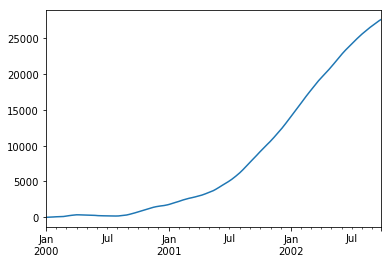

In [93]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.cumsum().plot()
plt.show()
#注：绘制时间序列图形，ts.cumsum()为累积值，绘图必须使用show()方法才能展现出来图。

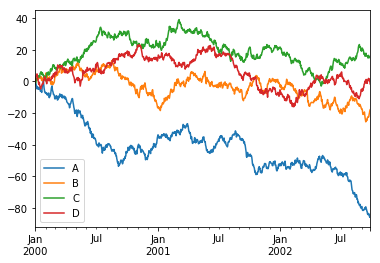

In [94]:
#在DataFrame中，plot（）可以方便地绘制带有标签的所有列：

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')
plt.show()

## 获取数据输入/输出
### CSV

In [95]:
#写入csv文件：http://pandas.pydata.org/pandas-docs/version/0.20/io.html#io-store-in-csv

df.to_csv('foo.csv')

In [96]:
#读取csv文件：http://pandas.pydata.org/pandas-docs/version/0.20/io.html#io-read-csv-table

pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.232588,1.550908,-0.542879,0.461456
1,2000-01-02,-1.759988,1.608444,-0.905876,1.495127
2,2000-01-03,-1.640229,0.520279,-0.009653,2.210483
3,2000-01-04,-3.065032,1.634421,1.478637,3.824536
4,2000-01-05,-2.762300,1.022128,0.836854,4.078961
5,2000-01-06,-4.671896,1.714394,1.870905,4.824478
6,2000-01-07,-4.076652,1.808288,3.017154,3.781560
7,2000-01-08,-3.381653,0.948164,3.256638,2.701349
8,2000-01-09,-4.649421,1.508747,2.746572,0.660095
9,2000-01-10,-4.031774,1.413663,2.992574,-0.051526


### Excel

读取和写入Excel文件：http://pandas.pydata.org/pandas-docs/version/0.20/io.html#io-excel

写入Excel：

In [97]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [98]:
#读取Excel：

pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,-0.232588,1.550908,-0.542879,0.461456
2000-01-02,-1.759988,1.608444,-0.905876,1.495127
2000-01-03,-1.640229,0.520279,-0.009653,2.210483
2000-01-04,-3.065032,1.634421,1.478637,3.824536
2000-01-05,-2.762300,1.022128,0.836854,4.078961
2000-01-06,-4.671896,1.714394,1.870905,4.824478
2000-01-07,-4.076652,1.808288,3.017154,3.781560
2000-01-08,-3.381653,0.948164,3.256638,2.701349
2000-01-09,-4.649421,1.508747,2.746572,0.660095
2000-01-10,-4.031774,1.413663,2.992574,-0.051526


### 易错点

如果你操作时遇到类似这种问题：


你可以看看这里的解释寻求帮助：http://pandas.pydata.org/pandas-docs/version/0.20/basics.html#basics-compare

也可以参考这里：http://pandas.pydata.org/pandas-docs/version/0.20/gotchas.html#gotchas

花了一天半时间把10分钟入门pandas官方文档解读了一下，大家有兴趣可以深入了解官方文档的内容，或者用到某部分再去查文档也是很ok的，哈哈。

感谢你的阅读~